In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('Dataset11-Weather-Data.csv')
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [5]:
data.shape

(8784, 8)

In [7]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [8]:
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [11]:
data.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [12]:
data.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [13]:
data.Weather.nunique()

50

In [15]:
x = 'Thunderstorms,Moderate Rain Showers,Fog'

In [16]:
list_of_lists = [w.split() for w in x.split(',')]
list_of_lists

[['Thunderstorms'], ['Moderate', 'Rain', 'Showers'], ['Fog']]

In [17]:
from itertools import chain
flat_list = list(chain(*list_of_lists))
flat_list

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [18]:
def Create_list(x):
    list_of_lists = [w.split() for w in x.split(',')]
    flat_list = list(chain(*list_of_lists))
    return flat_list

def Get_Weather(list1):
    if 'Snow' in list1 and 'Rain' in list1:
        return 'SNOW+RAIN'
    elif 'Rain' in list1 and 'Fog' in list1:
        return 'RAIN+FOG'
    elif 'Snow' in list1:
        return 'SNOW'
    elif 'Rain' in list1:
        return 'RAIN'
    elif 'Fog' in list1:
        return 'FOG'
    elif 'Clear' in list1:
        return 'Clear'
    elif 'Cloudy' in list1:
        return 'Cloudy'
    else:
        return 'RAIN'


In [19]:
Create_list(x)

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [20]:
Get_Weather(Create_list(x))

'RAIN+FOG'

In [21]:
data['Std_Weather'] = data['Weather'].apply(lambda x: Get_Weather(Create_list(x)))

In [22]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [23]:
data['Std_Weather'].value_counts()

Std_Weather
Cloudy       3797
Clear        3432
RAIN          603
SNOW          556
FOG           241
RAIN+FOG      128
SNOW+RAIN      27
Name: count, dtype: int64

In [ ]:
#Data Balancing

In [24]:
cloudy_df = data[data['Std_Weather'] == 'Cloudy']
cloudy_df_sample = cloudy_df.sample(600)
print(cloudy_df_sample.shape)

(600, 9)


In [25]:
clear_df = data[data['Std_Weather'] == 'Clear'].sample(600)
print(clear_df.shape)

(600, 9)


In [27]:
rain_df = data[data['Std_Weather'] == 'RAIN']
snow_df = data[data['Std_Weather'] == 'SNOW']

In [30]:
snow_df.shape

(556, 9)

In [31]:
rain_df.shape

(603, 9)

In [32]:
weather_df = pd.concat([cloudy_df_sample, clear_df, rain_df, snow_df], axis = 0)
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
1080,2/15/2012 0:00,-1.9,-5.6,76,4,25.0,101.26,Cloudy,Cloudy
3769,6/6/2012 1:00,13.8,7.2,64,9,25.0,100.97,Mostly Cloudy,Cloudy
3626,5/31/2012 2:00,15.6,11.2,75,4,25.0,100.32,Mostly Cloudy,Cloudy
2739,4/24/2012 3:00,7.0,5.5,90,15,12.9,98.53,Cloudy,Cloudy
35,1/2/2012 11:00,2.2,-3.5,66,30,24.1,99.19,Mostly Cloudy,Cloudy


In [33]:
weather_df.shape

(2359, 9)

In [35]:
weather_df.Std_Weather.value_counts()

Std_Weather
RAIN      603
Cloudy    600
Clear     600
SNOW      556
Name: count, dtype: int64

In [36]:
# Dropping 'Date/Time' and 'Weather' columns from the DataFrame
weather_df.drop(columns=['Date/Time', 'Weather'], axis=1, inplace=True)

In [37]:
# Displaying the first few rows of the modified DataFrame
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
1080,-1.9,-5.6,76,4,25.0,101.26,Cloudy
3769,13.8,7.2,64,9,25.0,100.97,Cloudy
3626,15.6,11.2,75,4,25.0,100.32,Cloudy
2739,7.0,5.5,90,15,12.9,98.53,Cloudy
35,2.2,-3.5,66,30,24.1,99.19,Cloudy


In [38]:
# Displaying duplicate records in the DataFrame
duplicate_records = weather_df[weather_df.duplicated()]
duplicate_records


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather


In [39]:
weather_df.isnull().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Std_Weather         0
dtype: int64

In [40]:
weather_df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,6.425986,1.340526,72.265367,16.558711,23.116829,100.824794
std,11.500045,10.660606,16.034075,9.202362,12.684038,0.932772
min,-22.200000,-27.800000,21.000000,0.000000,0.600000,97.520000
25%,-3.200000,-7.000000,62.000000,9.000000,16.100000,100.310000
50%,5.100000,0.300000,75.000000,15.000000,24.100000,100.830000
75%,16.200000,10.400000,85.000000,22.000000,25.000000,101.400000
max,33.000000,24.400000,99.000000,57.000000,48.300000,103.630000


In [41]:
# Selecting the columns to compute the correlation matrix
cols = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

In [42]:
cor_matrix = weather_df[cols].corr()

cor_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.941802,-0.240018,-0.125792,0.372059,-0.123654
Dew Point Temp_C,0.941802,1.000000,0.093708,-0.115839,0.159538,-0.228730
Rel Hum_%,-0.240018,0.093708,1.000000,0.045967,-0.667459,-0.319798
Wind Speed_km/h,-0.125792,-0.115839,0.045967,1.000000,-0.151471,-0.394817
Visibility_km,0.372059,0.159538,-0.667459,-0.151471,1.000000,0.331737
Press_kPa,-0.123654,-0.228730,-0.319798,-0.394817,0.331737,1.000000


<Axes: >

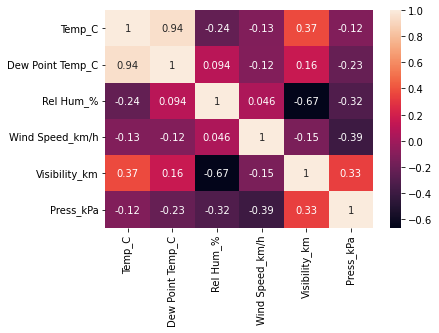

In [43]:
#Heat Map

sns.heatmap(cor_matrix, annot=True,)

In [46]:
weather_df.columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Std_Weather'],
      dtype='object')

# HISTOGRAMS

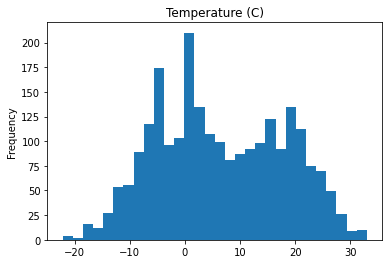

In [47]:
# Plot histogram for 'Temp_C'
weather_df['Temp_C'].plot(kind='hist', title='Temperature (C)', bins=30)
plt.show()


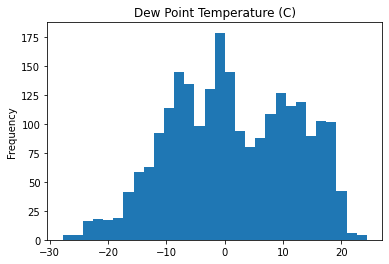

In [48]:
# Plot histogram for 'Dew Point Temp_C'
weather_df['Dew Point Temp_C'].plot(kind='hist', title='Dew Point Temperature (C)', bins=30)
plt.show()


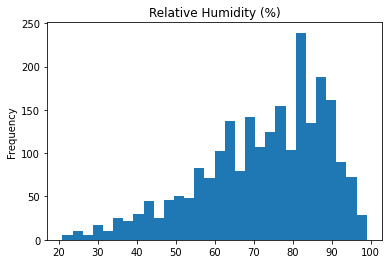

In [49]:
# Plot histogram for 'Rel Hum_%'
weather_df['Rel Hum_%'].plot(kind='hist', title='Relative Humidity (%)', bins=30)
plt.show()


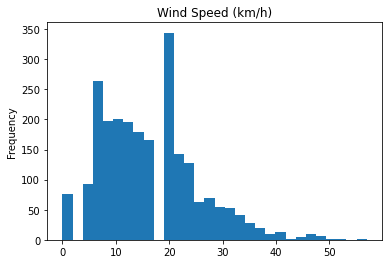

In [50]:
# Plot histogram for 'Wind Speed_km/h'
weather_df['Wind Speed_km/h'].plot(kind='hist', title='Wind Speed (km/h)', bins=30)
plt.show()


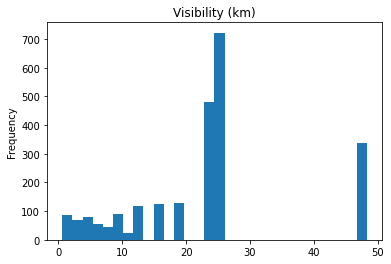

In [51]:
# Plot histogram for 'Visibility_km'
weather_df['Visibility_km'].plot(kind='hist', title='Visibility (km)', bins=30)
plt.show()


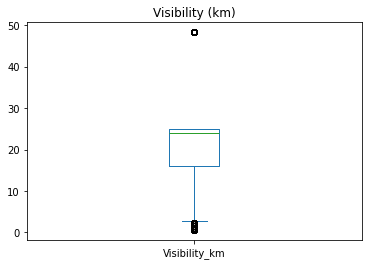

In [52]:
# Plot box plot for 'Visibility_km'
weather_df['Visibility_km'].plot(kind='box', title='Visibility (km)')
plt.show()


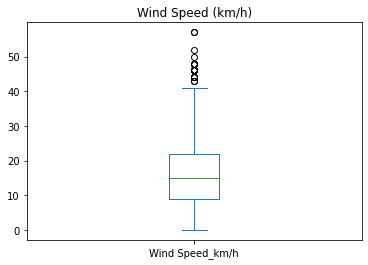

In [53]:
# Plot box plot for 'Wind Speed_km/h'
weather_df['Wind Speed_km/h'].plot(kind='box', title='Wind Speed (km/h)')
plt.show()


In [54]:

weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
1080,-1.9,-5.6,76,4,25.0,101.26,Cloudy
3769,13.8,7.2,64,9,25.0,100.97,Cloudy
3626,15.6,11.2,75,4,25.0,100.32,Cloudy
2739,7.0,5.5,90,15,12.9,98.53,Cloudy
35,2.2,-3.5,66,30,24.1,99.19,Cloudy


# label encoder

In [55]:
from sklearn.preprocessing import LabelEncoder

In [57]:
# Initialize LabelEncoder
label_Encoder = LabelEncoder()

# Fit and transform the 'Std_Weather' column
weather_df['Std_Weather'] = label_Encoder.fit_transform(weather_df['Std_Weather'])

In [58]:
label_Encoder.classes_

array(['Clear', 'Cloudy', 'RAIN', 'SNOW'], dtype=object)

In [59]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
1080,-1.9,-5.6,76,4,25.0,101.26,1
3769,13.8,7.2,64,9,25.0,100.97,1
3626,15.6,11.2,75,4,25.0,100.32,1
2739,7.0,5.5,90,15,12.9,98.53,1
35,2.2,-3.5,66,30,24.1,99.19,1


In [60]:
weather_df['Std_Weather'].value_counts()

Std_Weather
2    603
1    600
0    600
3    556
Name: count, dtype: int64

In [61]:
#INdependent Variable
X = weather_df.drop(['Std_Weather'], axis = 1)
X

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
1080,-1.9,-5.6,76,4,25.0,101.26
3769,13.8,7.2,64,9,25.0,100.97
3626,15.6,11.2,75,4,25.0,100.32
2739,7.0,5.5,90,15,12.9,98.53
35,2.2,-3.5,66,30,24.1,99.19
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


In [63]:
Y = weather_df['Std_Weather']
Y

1080    1
3769    1
3626    1
2739    1
35      1
       ..
8779    3
8780    3
8781    3
8782    3
8783    3
Name: Std_Weather, Length: 2359, dtype: int64

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
std_scaler = StandardScaler()

# Apply scaling to the feature matrix X
X_std = std_scaler.fit_transform(X)
X_std

array([[-0.7241494 , -0.65118226,  0.23296793, -1.36501627,  0.14849925,
         0.46667119],
       [ 0.64135207,  0.54975458, -0.51559689, -0.82156232,  0.14849925,
         0.15570404],
       [ 0.79790638,  0.92504734,  0.17058752, -1.36501627,  0.14849925,
        -0.5412913 ],
       ...,
       [-0.60238494, -0.26650718,  1.29343475,  1.24356272, -1.4443912 ,
        -0.93804249],
       [-0.57629255, -0.29465414,  1.04391315,  1.24356272, -1.05799698,
        -0.98093452],
       [-0.55889763, -0.32280109,  0.85677194,  1.46094431, -0.93182744,
        -1.00238053]])

In [66]:
#Splitting Data into training and testing

from sklearn.model_selection import train_test_split

In [68]:

# Splitting the scaled data (X_std) and target variable (y) into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_std, Y, test_size=0.2, random_state=42)

In [69]:
x_train.shape, x_test.shape

((1887, 6), (472, 6))

# Model Building

In [70]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()

In [71]:
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [72]:
y_pred_dt = decision_tree_model.predict(x_test)

# Evaluations

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [75]:
accuracy_score(y_test,y_pred_dt)

0.5847457627118644

In [78]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.50      0.46      0.48       118
           1       0.43      0.48      0.45       128
           2       0.68      0.70      0.69       126
           3       0.80      0.73      0.76       100

    accuracy                           0.58       472
   macro avg       0.60      0.59      0.59       472
weighted avg       0.59      0.58      0.59       472



<Axes: >

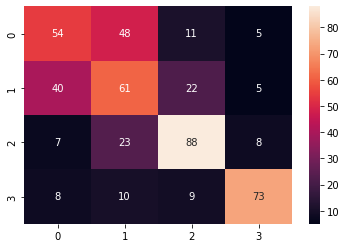

In [80]:
cm = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm, annot=True , fmt = 'd')

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf_model = RandomForestClassifier()

In [83]:
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
y_pred_rf = rf_model.predict(x_test)

In [88]:
accuracy_score(y_test,y_pred_rf)

0.6483050847457628

In [89]:
# Importing the necessary classifiers from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [90]:
# Initializing the different machine learning models
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svc_model = SVC()
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression()
nb_model = GaussianNB()


In [91]:
# List of models for evaluation
model_list = [dt_model, rf_model, svc_model, knn_model, lr_model, nb_model]

In [92]:
# Initialize an empty list to store accuracy scores
acc_list = []

# Evaluate each model
for model in model_list:
    model.fit(x_train, y_train)          # Fit the model on the training data
    y_pred = model.predict(x_test)       # Make predictions on the test set
    acc = accuracy_score(y_test, y_pred) # Calculate accuracy
    acc_list.append(acc)                  # Append accuracy to the list

In [93]:
acc_list

[0.5826271186440678,
 0.6546610169491526,
 0.5911016949152542,
 0.5911016949152542,
 0.6207627118644068,
 0.5720338983050848]

In [94]:
model_df = pd.DataFrame({'Model': [type(model).__name__ for model in model_list], "Accuracy": acc_list})

model_df

,Model,Accuracy
0,DecisionTreeClassifier,0.582627
1,RandomForestClassifier,0.654661
2,SVC,0.591102
3,KNeighborsClassifier,0.591102
4,LogisticRegression,0.620763
5,GaussianNB,0.572034


# Hyper Tuning

In [95]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
parameters = {
    'n_estimators': [50, 100],
    'max_features': ['sqrt', 'log2', None]
}

In [101]:
# Initialize GridSearchCV with the RandomForest model and the parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=parameters)

grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100]})

In [109]:
best_params = grid_search.best_params_
best_params

{'max_features': 'sqrt', 'n_estimators': 100}

In [110]:
random_forest_model_new = RandomForestClassifier(max_features=best_params['max_features'], 
                                                  n_estimators=best_params['n_estimators'])

In [111]:
random_forest_model_new.fit(x_train, y_train)

RandomForestClassifier()

In [112]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest_model_new, X_std, Y, cv=5, scoring='accuracy')
print('Cross-Validation scores = ',scores)

Cross-Validation scores =  [0.59745763 0.66525424 0.58474576 0.61228814 0.6836518 ]


In [113]:
scores.mean()

np.float64(0.6286795134765554)